In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('MavenRail.csv')

In [3]:
df

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30,2024-04-30 20:30,On Time,NaN,No
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35,2024-04-30 21:35,On Time,NaN,No
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45,2024-04-30 20:45,On Time,NaN,No
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35,2024-04-30 22:35,On Time,NaN,No


### EDA

##### Summary of Data

In [6]:
df.describe()

,Price
count,31645.000000
mean,23.434634
std,29.990379
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31645 non-null  object
 1   Railcard           10734 non-null  object
 2   Ticket.Class       31645 non-null  object
 3   Ticket.Type        31645 non-null  object
 4   Price              31645 non-null  int64 
 5   Departure.Station  31645 non-null  object
 6   Arrival.Station    31645 non-null  object
 7   Departure          31642 non-null  object
 8   Scheduled.Arrival  31641 non-null  object
 9   Actual.Arrival     29765 non-null  object
 10  Journey.Status     31645 non-null  object
 11  Reason.for.Delay   4166 non-null   object
 12  Refund.Request     31645 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB


##### Finding out the null values

In [9]:
df.isnull().sum()

Payment.Method           0
Railcard             20911
Ticket.Class             0
Ticket.Type              0
Price                    0
Departure.Station        0
Arrival.Station          0
Departure                3
Scheduled.Arrival        4
Actual.Arrival        1880
Journey.Status           0
Reason.for.Delay     27479
Refund.Request           0
dtype: int64

##### visualising Missing Values

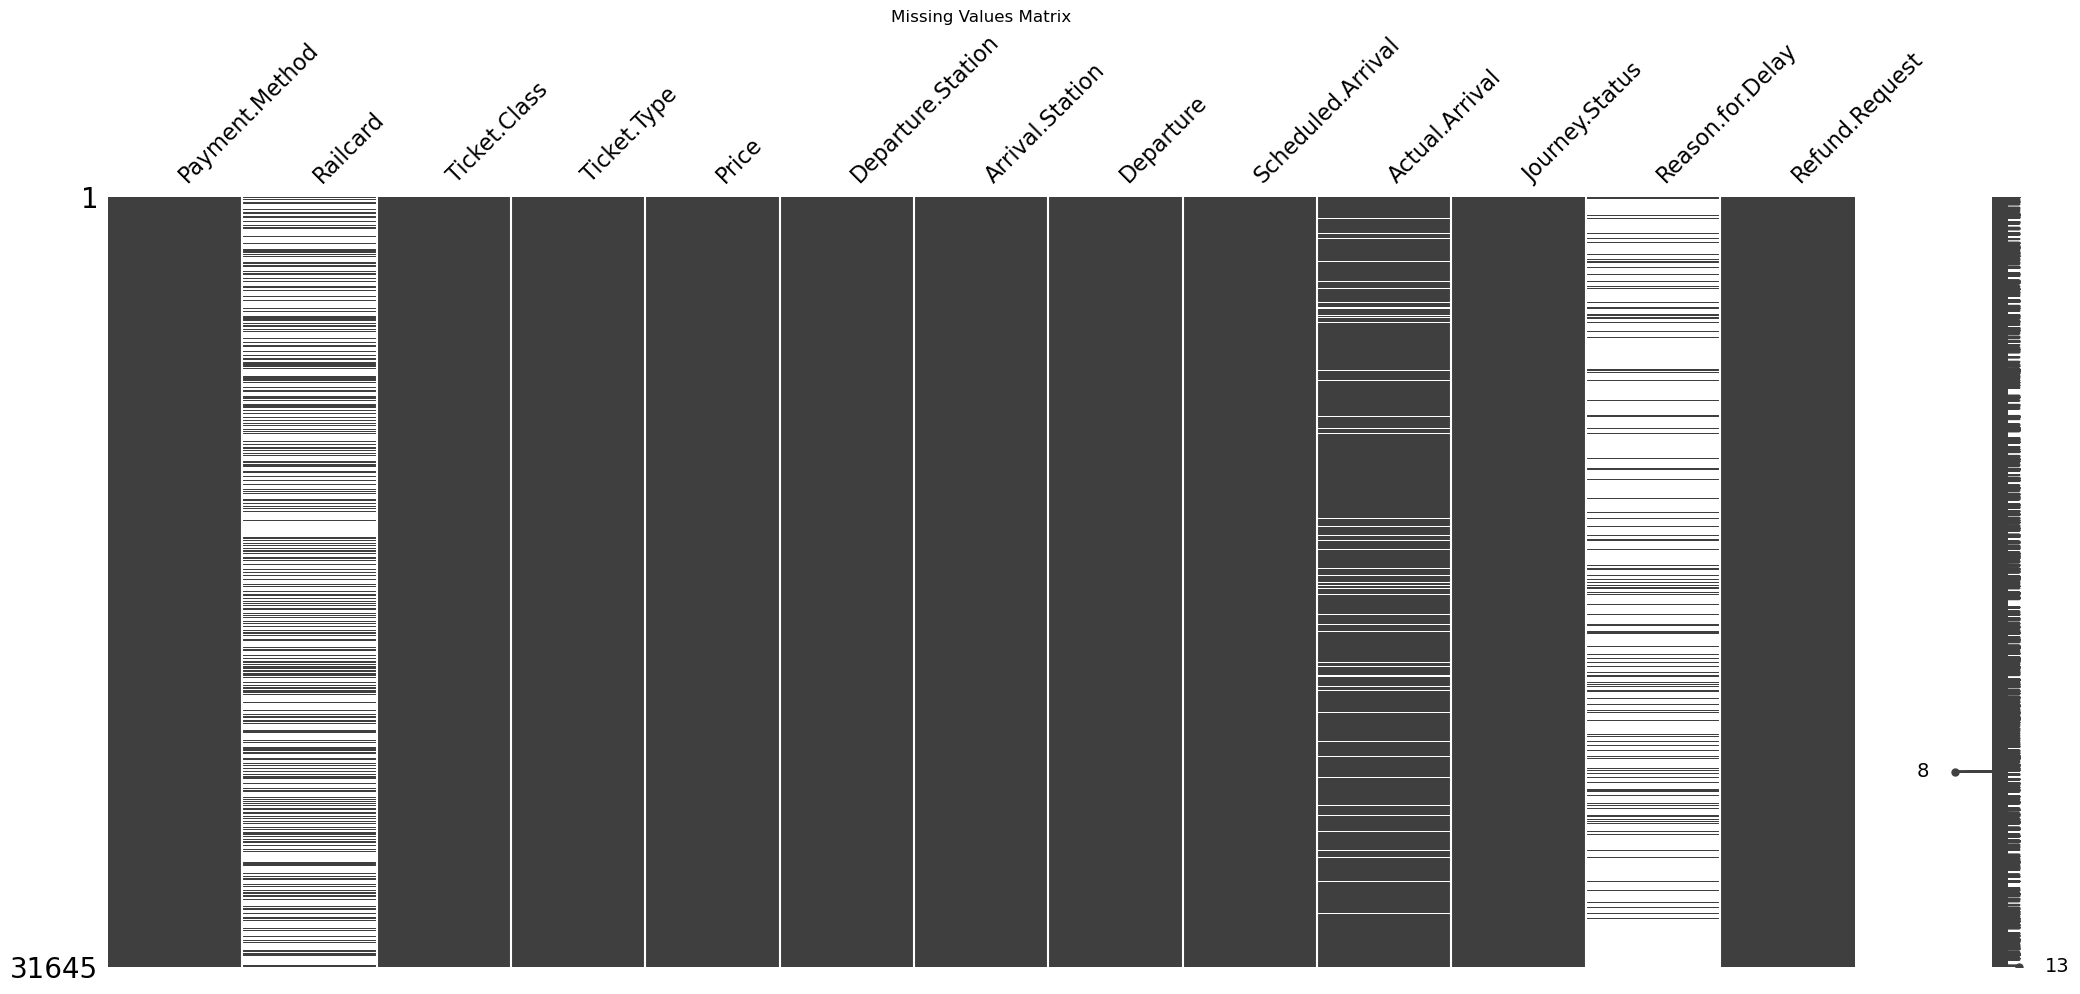

In [11]:
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

##### Categorical Variable Analysis

In [13]:
categorical_vars = ['Payment.Method', 'Railcard', 'Ticket.Class', 'Journey.Status']
for var in categorical_vars:
    print(df[var].value_counts())

Payment.Method
Credit Card    19133
Contactless    10832
Debit Card      1680
Name: count, dtype: int64
Railcard
Adult       4845
Disabled    3089
Senior      2800
Name: count, dtype: int64
Ticket.Class
Standard       28588
First Class     3057
Name: count, dtype: int64
Journey.Status
On Time      27479
Delayed       2289
Cancelled     1877
Name: count, dtype: int64


##### Distribution of ticket prices

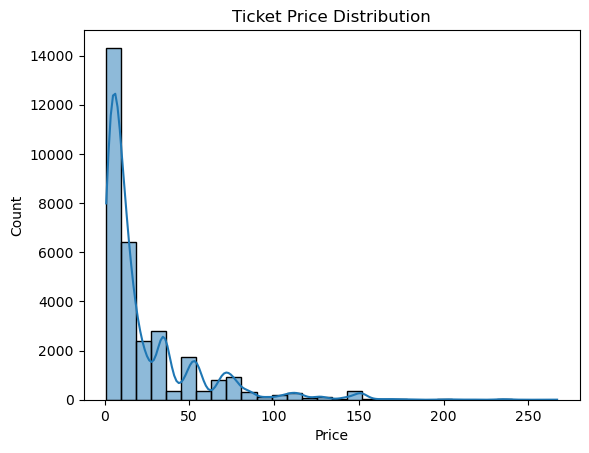

In [15]:
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Ticket Price Distribution")
plt.show()

##### Crosstab

In [17]:
crosstab = pd.crosstab(df['Railcard'], df['Journey.Status'])
print(crosstab)

Journey.Status  Cancelled  Delayed  On Time
Railcard                                   
Adult                 221      664     3960
Disabled              190      136     2763
Senior                197       81     2522


##### Correlations of Numericsl Features

In [19]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

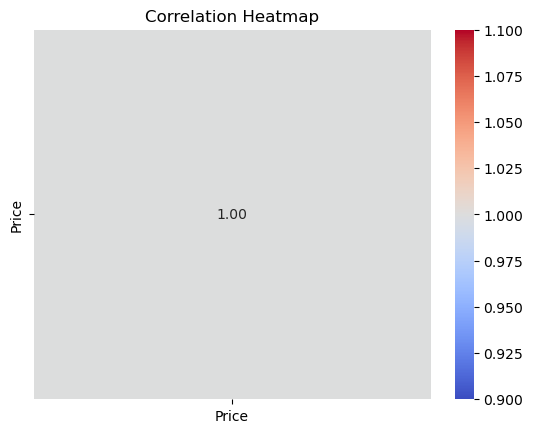

In [20]:
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

##### ourney Status Distribution by Station

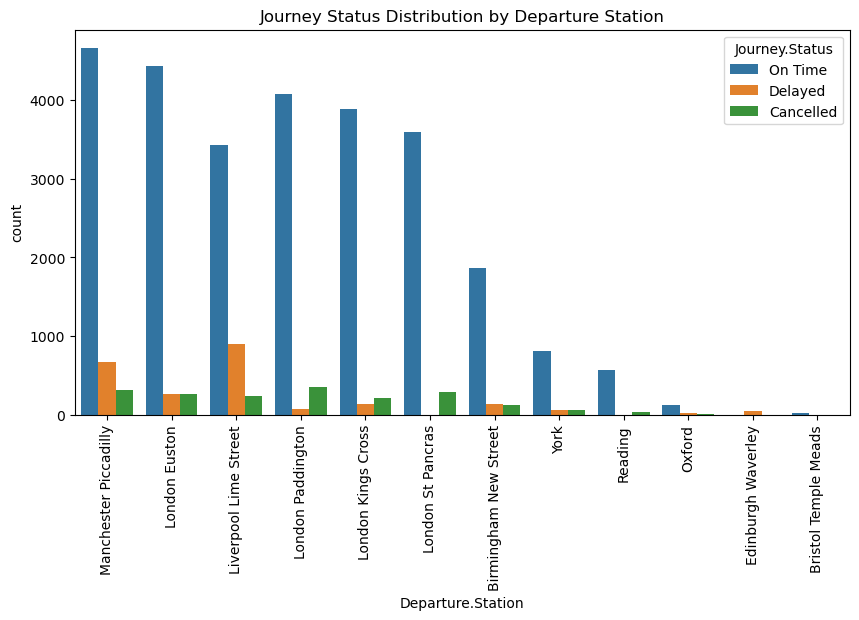

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Departure.Station', hue='Journey.Status', order=df['Departure.Station'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Journey Status Distribution by Departure Station")
plt.show()
plt.savefig("journey.png")

##### Refund Request Analysis

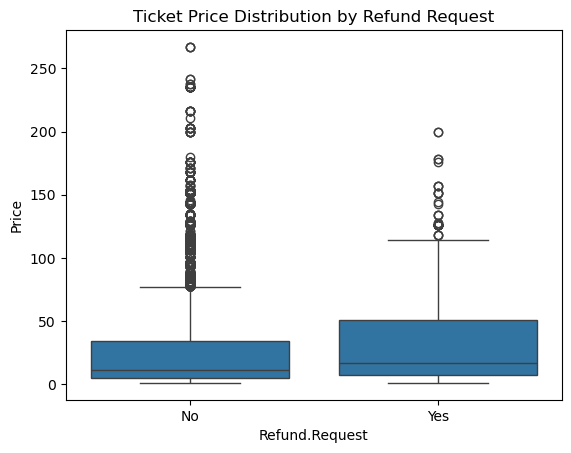

In [24]:
sns.boxplot(data=df, x='Refund.Request', y='Price')
plt.title("Ticket Price Distribution by Refund Request")
plt.show()

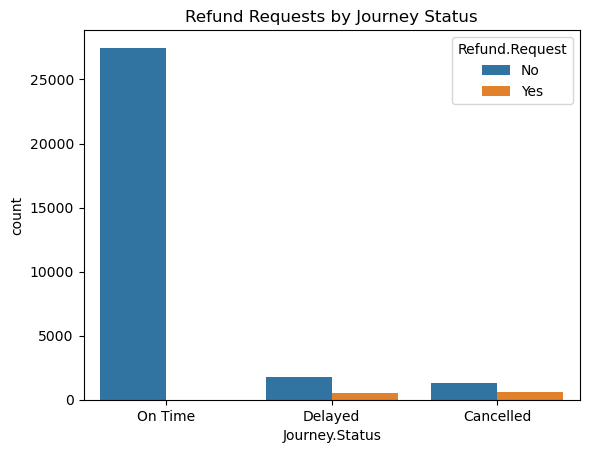

In [26]:
sns.countplot(data=df, x='Journey.Status', hue='Refund.Request')
plt.title("Refund Requests by Journey Status")
plt.show()

##### Category vs. Price Analysis

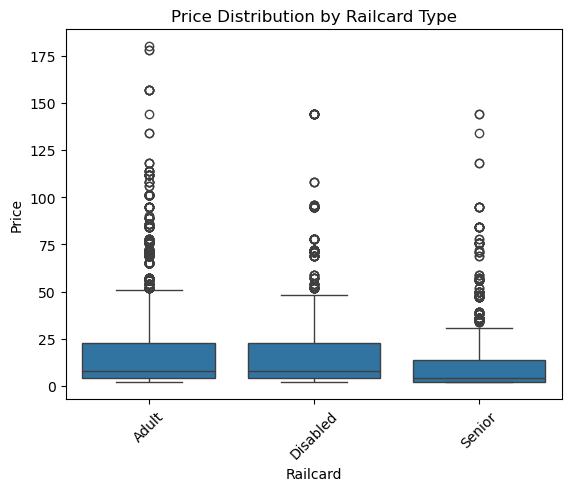

In [33]:
sns.boxplot(data=df, x='Railcard', y='Price')
plt.title("Price Distribution by Railcard Type")
plt.xticks(rotation=45)
plt.show()

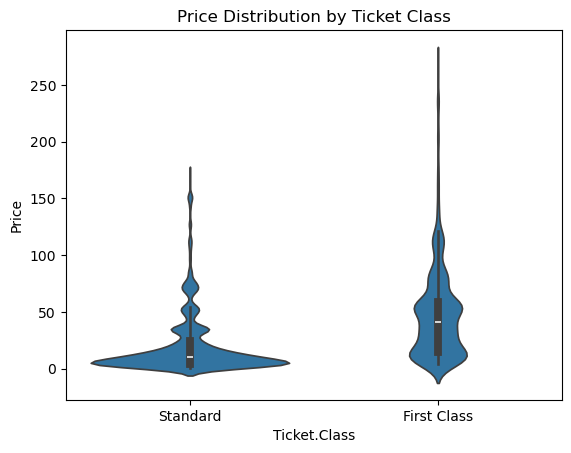

In [34]:
sns.violinplot(data=df, x='Ticket.Class', y='Price')
plt.title("Price Distribution by Ticket Class")
plt.show()

##### Delay Reasons

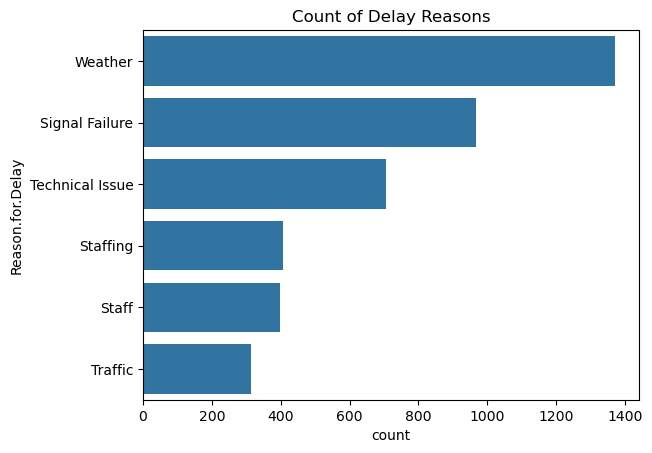

In [36]:
delay_reasons = df[df['Reason.for.Delay'].notnull()]
sns.countplot(data=delay_reasons, y='Reason.for.Delay', order=delay_reasons['Reason.for.Delay'].value_counts().index)
plt.title("Count of Delay Reasons")
plt.show()

### Adding Delay in Minutes

In [38]:
# Convert time columns to datetime
df['Scheduled.Arrival'] = pd.to_datetime(df['Scheduled.Arrival'],format='%Y-%m-%d %H:%M')
df['Actual.Arrival'] = pd.to_datetime(df['Actual.Arrival'],format='%Y-%m-%d %H:%M')

df['DelayInMinutes'] = (df['Actual.Arrival'] - df['Scheduled.Arrival']).dt.total_seconds() / 60
df.loc[df['Journey.Status'] == 'On Time', 'DelayInMinutes'] = None

df.to_csv("df_updated.csv", index=False)


### Analyze Refunds Based on Medium Price

In [42]:
delayed_journeys = df[df['Journey.Status'] != 'On Time']

In [45]:
delayed_journeys.loc[:, 'MediumPrice'] = (delayed_journeys['Price'] > 10) & (delayed_journeys['Price'] <= 30)

In [47]:
delayed_journeys.loc[:, 'MediumPrice'] = delayed_journeys['MediumPrice'].astype(int)
delayed_journeys.loc[:, 'Refund.Request'] = delayed_journeys['Refund.Request'].map({'Yes': 1, 'No': 0})

In [49]:
delayed_journeys['Refund.Request'] = delayed_journeys['Refund.Request'].fillna(0)

In [52]:
delayed_journeys['DelayInMinute'] = delayed_journeys['DelayInMinutes'].fillna(0)

In [56]:
X = delayed_journeys[['MediumPrice']]
y = delayed_journeys['Refund.Request']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.737410071942446


In [71]:
print("Probability of refund for £5 ticket:", model.predict_proba([[0]])[0, 1])
print("Probability of refund for £25 ticket:", model.predict_proba([[1]])[0, 1])

Probability of refund for £5 ticket: 0.2573495842406222
Probability of refund for £25 ticket: 0.3204475649426231


### Predict Refunds for ToPredict.csv

In [74]:
df2 = pd.read_csv("ToPredict(1).csv")

In [76]:
delayed_journeys2 = df[df['Journey.Status'] != 'On Time']

In [78]:
delayed_journeys2['Delayed'] = (delayed_journeys2['Journey.Status'] != 'On Time').astype(int)

In [80]:
selected_columns = ['Delayed', 'Refund.Request']

In [82]:
train_data2 = delayed_journeys2[selected_columns].copy()

In [84]:
x = train_data2.drop('Refund.Request', axis=1)
Y = train_data2['Refund.Request']

In [86]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [88]:
model2 = LogisticRegression(max_iter=1000)
model2.fit(x_train, Y_train)

LogisticRegression(max_iter=1000)

In [90]:
Y_pred = model2.predict(x_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Logistic Regression Accuracy with Journey.Status (Delayed):", accuracy)

Logistic Regression Accuracy with Journey.Status (Delayed): 0.737410071942446


In [92]:
coefficients = pd.DataFrame(model2.coef_, columns=x.columns)
print("Feature Coefficients:\n", coefficients)

Feature Coefficients:
     Delayed
0  0.007893


In [94]:
df2['Delayed'] = (df2['Journey.Status'] != 'On Time').astype(int)

In [96]:
x_to_predict = df2[['Delayed']]

In [98]:
df2['Refund.Probability'] = model2.predict_proba(x_to_predict)[:, 1]

In [100]:
print(df2[['Price', 'Delayed', 'Refund.Probability']])

   Price  Delayed  Refund.Probability
0     54        0            0.267082
1      7        0            0.267082
2    113        1            0.268630
3      3        1            0.268630
4      4        1            0.268630
5      3        1            0.268630
6    126        1            0.268630
7     22        1            0.268630
